<a href="https://colab.research.google.com/github/NihilisticMotif/Data-Science-Documentation/blob/main/Data-Science-Documentation/ML_Algorithm/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###To Do Now
1. Explain briefly what is neural network and how it works
2. Explain and implement different type of Activation Functions (https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253)
3. Explain, compare and implement backpropagation and gradient descent
4. Implement one hidden layer neural network that is based on iris-flower-dataset
5. Implement 3 layer neural network that is based on MNIST dataset (create 2 versions, the first one is created from sketch, the second one have no hidden layer and third one is based on ML library)
6. compare the accuracy of every implemented ML code.

###Note
1. ReLU cannot be used in Output layer

###Question
1. Why neural network have multiple layers?
2. Why using ReLU instead of Linear regression?

# Introduction

###Linear Algebra Notation

**Linear algebra notation**

**Vector Space**

Vector Space = a space comprised of vectors, collectively with the associative and commutative law of addition of vectors and also the associative and distributive process of multiplication of vectors by scalars is called vector space. (https://byjus.com/maths/vector-space/)
1. $\vec{a_m}+\vec{b_m}=\vec{b_m}+\vec{a_m}\in\mathbb{R^m}$
2. $c\vec{v_m}=\vec{v_m}c\in\mathbb{R^m}$

**Vector Space Notation**

* $a\in\mathbb{R}$
* $\vec{a}_m\in\mathbb{R^m}$
* $A_{m\times n}\in\mathbb{R^{m\times n}}$
* $1_{m\times n}\in\mathbb{R^{m\times n}}=$ matrix that have only $1$ as its elements.
* $a^{\{n\}}=a$ no. $n$ which is $\in\mathbb{R}$
* $\vec{a}_m^{\{n\}}=$ vector $a$ no. $n$ which is $\in\mathbb{R^m}$
* $a^n=\Pi_{i=1}^n a$
* $\vec{a}_m^n=\Pi_{i=1}^n\vec{a}_m$

**Transpose**
* $A_{m\times n}\implies A^T_{n\times m}$

**Dot product**

* $\vec{a_n}\cdot\vec{b_n}=\sum_{i=1}^na^{\{i\}}b^{\{i\}}$

**Matrix Multiplication**

$R_{n\times m}\cdot C_{m\times q}=P_{n\times q}$

$\vec{r_m}^{\{i\leq n\}}\cdot\vec{c_m}^{\{j\leq q\}}=p^{\{i\leq n, j\leq q\}}$

* $\vec{r_m}^{\{i\leq n\}}=$ row vector of matrix $R_{n\times m}$ no.$i$
* $\vec{c_m}^{\{j\leq q\}}=$ column vector of matrix $C_{m\times q}$ no.$j$
* $i,j\in\mathbb{Z}$
* $i\in[1,n]$
* $j\in[1,p]$

reference: https://www.mathsisfun.com/algebra/matrix-multiplying.html

# Logistic Regression

###Get Data

In [ ]:
from google.colab import drive

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

path='/content/drive/MyDrive/Data-Science-Documentation/DataSet/IRIS.csv'
'''
Source of the data set: https://www.kaggle.com/datasets/arshid/iris-flower-dataset
'''
df = pd.read_csv(path)
df.head()
#df.astype(float)

Mounted at /content/drive


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
for i in df['species'].value_counts().index.tolist():
  df[i]=np.zeros(df.shape[0])
  # reference: https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts
  # reference: https://www.statology.org/add-numpy-array-to-pandas-dataframe/

In [ ]:
for i in range(df.shape[0]):
  for j in range(3):
    if df.iloc[i,4]==df['species'].value_counts().index.tolist()[j]:
      df.iloc[i,j-3]=1

In [ ]:
df[df['species']==df['species'].value_counts().index.tolist()[2]].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,Iris-setosa,Iris-versicolor,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica,0.0,0.0,1.0
101,5.8,2.7,5.1,1.9,Iris-virginica,0.0,0.0,1.0
102,7.1,3.0,5.9,2.1,Iris-virginica,0.0,0.0,1.0
103,6.3,2.9,5.6,1.8,Iris-virginica,0.0,0.0,1.0
104,6.5,3.0,5.8,2.2,Iris-virginica,0.0,0.0,1.0


In [ ]:
df=df.drop('species', axis=1)

In [ ]:
df.iloc[:,[-3,-2,-1]] 
# reference: https://sparkbyexamples.com/pandas/pandas-select-multiple-columns-in-dataframe/

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [ ]:
# Separate training and evaluating data in order to evaluate how well the algorithm predict data out side its data set.

def SeparateData(data,Ratio,nameY):

  DataRatio = int(data.shape[0]*Ratio)
  Data=data.sample(frac = 1)

  TrainX=Data.iloc[:DataRatio,[0,1,2,3]]
  TrainY=Data.iloc[:DataRatio,[-3,-2,-1]]
  TesttX=Data.iloc[DataRatio:,[0,1,2,3]]
  TesttY=Data.iloc[DataRatio:,[-3,-2,-1]]

  return [TrainX,TrainY,TesttX,TesttY]

# Data A
Data=SeparateData(df,0.75,df.columns[-1])
Trai_X=Data[0]
Trai_Y=Data[1]
Test_X=Data[2]
Test_Y=Data[3]

In [ ]:
Trai_X.shape

(112, 4)

In [ ]:
print(Trai_X.iloc[82,:])
print(Trai_Y.iloc[82])

sepal_length    6.0
sepal_width     3.0
petal_length    4.8
petal_width     1.8
Name: 138, dtype: float64
Iris-setosa        0.0
Iris-versicolor    0.0
Iris-virginica     1.0
Name: 138, dtype: float64


In [ ]:
df[(df['sepal_length']==5.5) & (df['sepal_width']==4.2)]

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
33,5.5,4.2,1.4,0.2,1.0,0.0,0.0


###Introduction of Logistic Regression
* Hypothesis Function
* Loss Function
* Gradient Descent

**What is Logistic Regression?**

Logistic regression is a supervised learning algorithm used for categorize somethings. 

In this case, we want to categorize different types of Iris Flower such as Iris-setosa, Iris-versicolor and Iris-virginica based on its sepal_length, sepal_width, petal_length and petal_width.

**Binary Logistic Regression vs Multinomial logistic regression**
1. Binary logistic regression
* This algorithm categorize things into 2 types. $[0,1]$
* e.g. Is the patient have cancer? Is the fruits rotten?
2. Multinomial logistic regression
* This algorithm categorize things into 3 or more types. It works by compute Binary logistic regression on each type in order to find out if something is likely to be categorized in one type than other.
* e.g. Classifying texts into what language they come from., Predicting whether a student will go to college, trade school or into the workforce., Does your cat prefer wet food, dry food or human food? etc.

**Reference:**
* https://www.mastersindatascience.org/learning/machine-learning-algorithms/logistic-regression/
* https://youtu.be/-EIfb6vFJzc 

**Logistic Regression contains 3 components**
* Hypothesis Function
* Loss Function
* Gradient Descent

**Hypothesis Function**

Hypothesis function is the function that estimated the pattern of the dataset.

* $y'=h(\vec{x}_n)=\frac{1}{1 + \exp({-(\vec{w_n}\cdot\vec{x_n}+b)})}=$ Probability $\in[0,1]$
* $n=$ number of all features
* $\vec{x}=$ input
* $\vec{w}=$ weight
* $b=$ bias

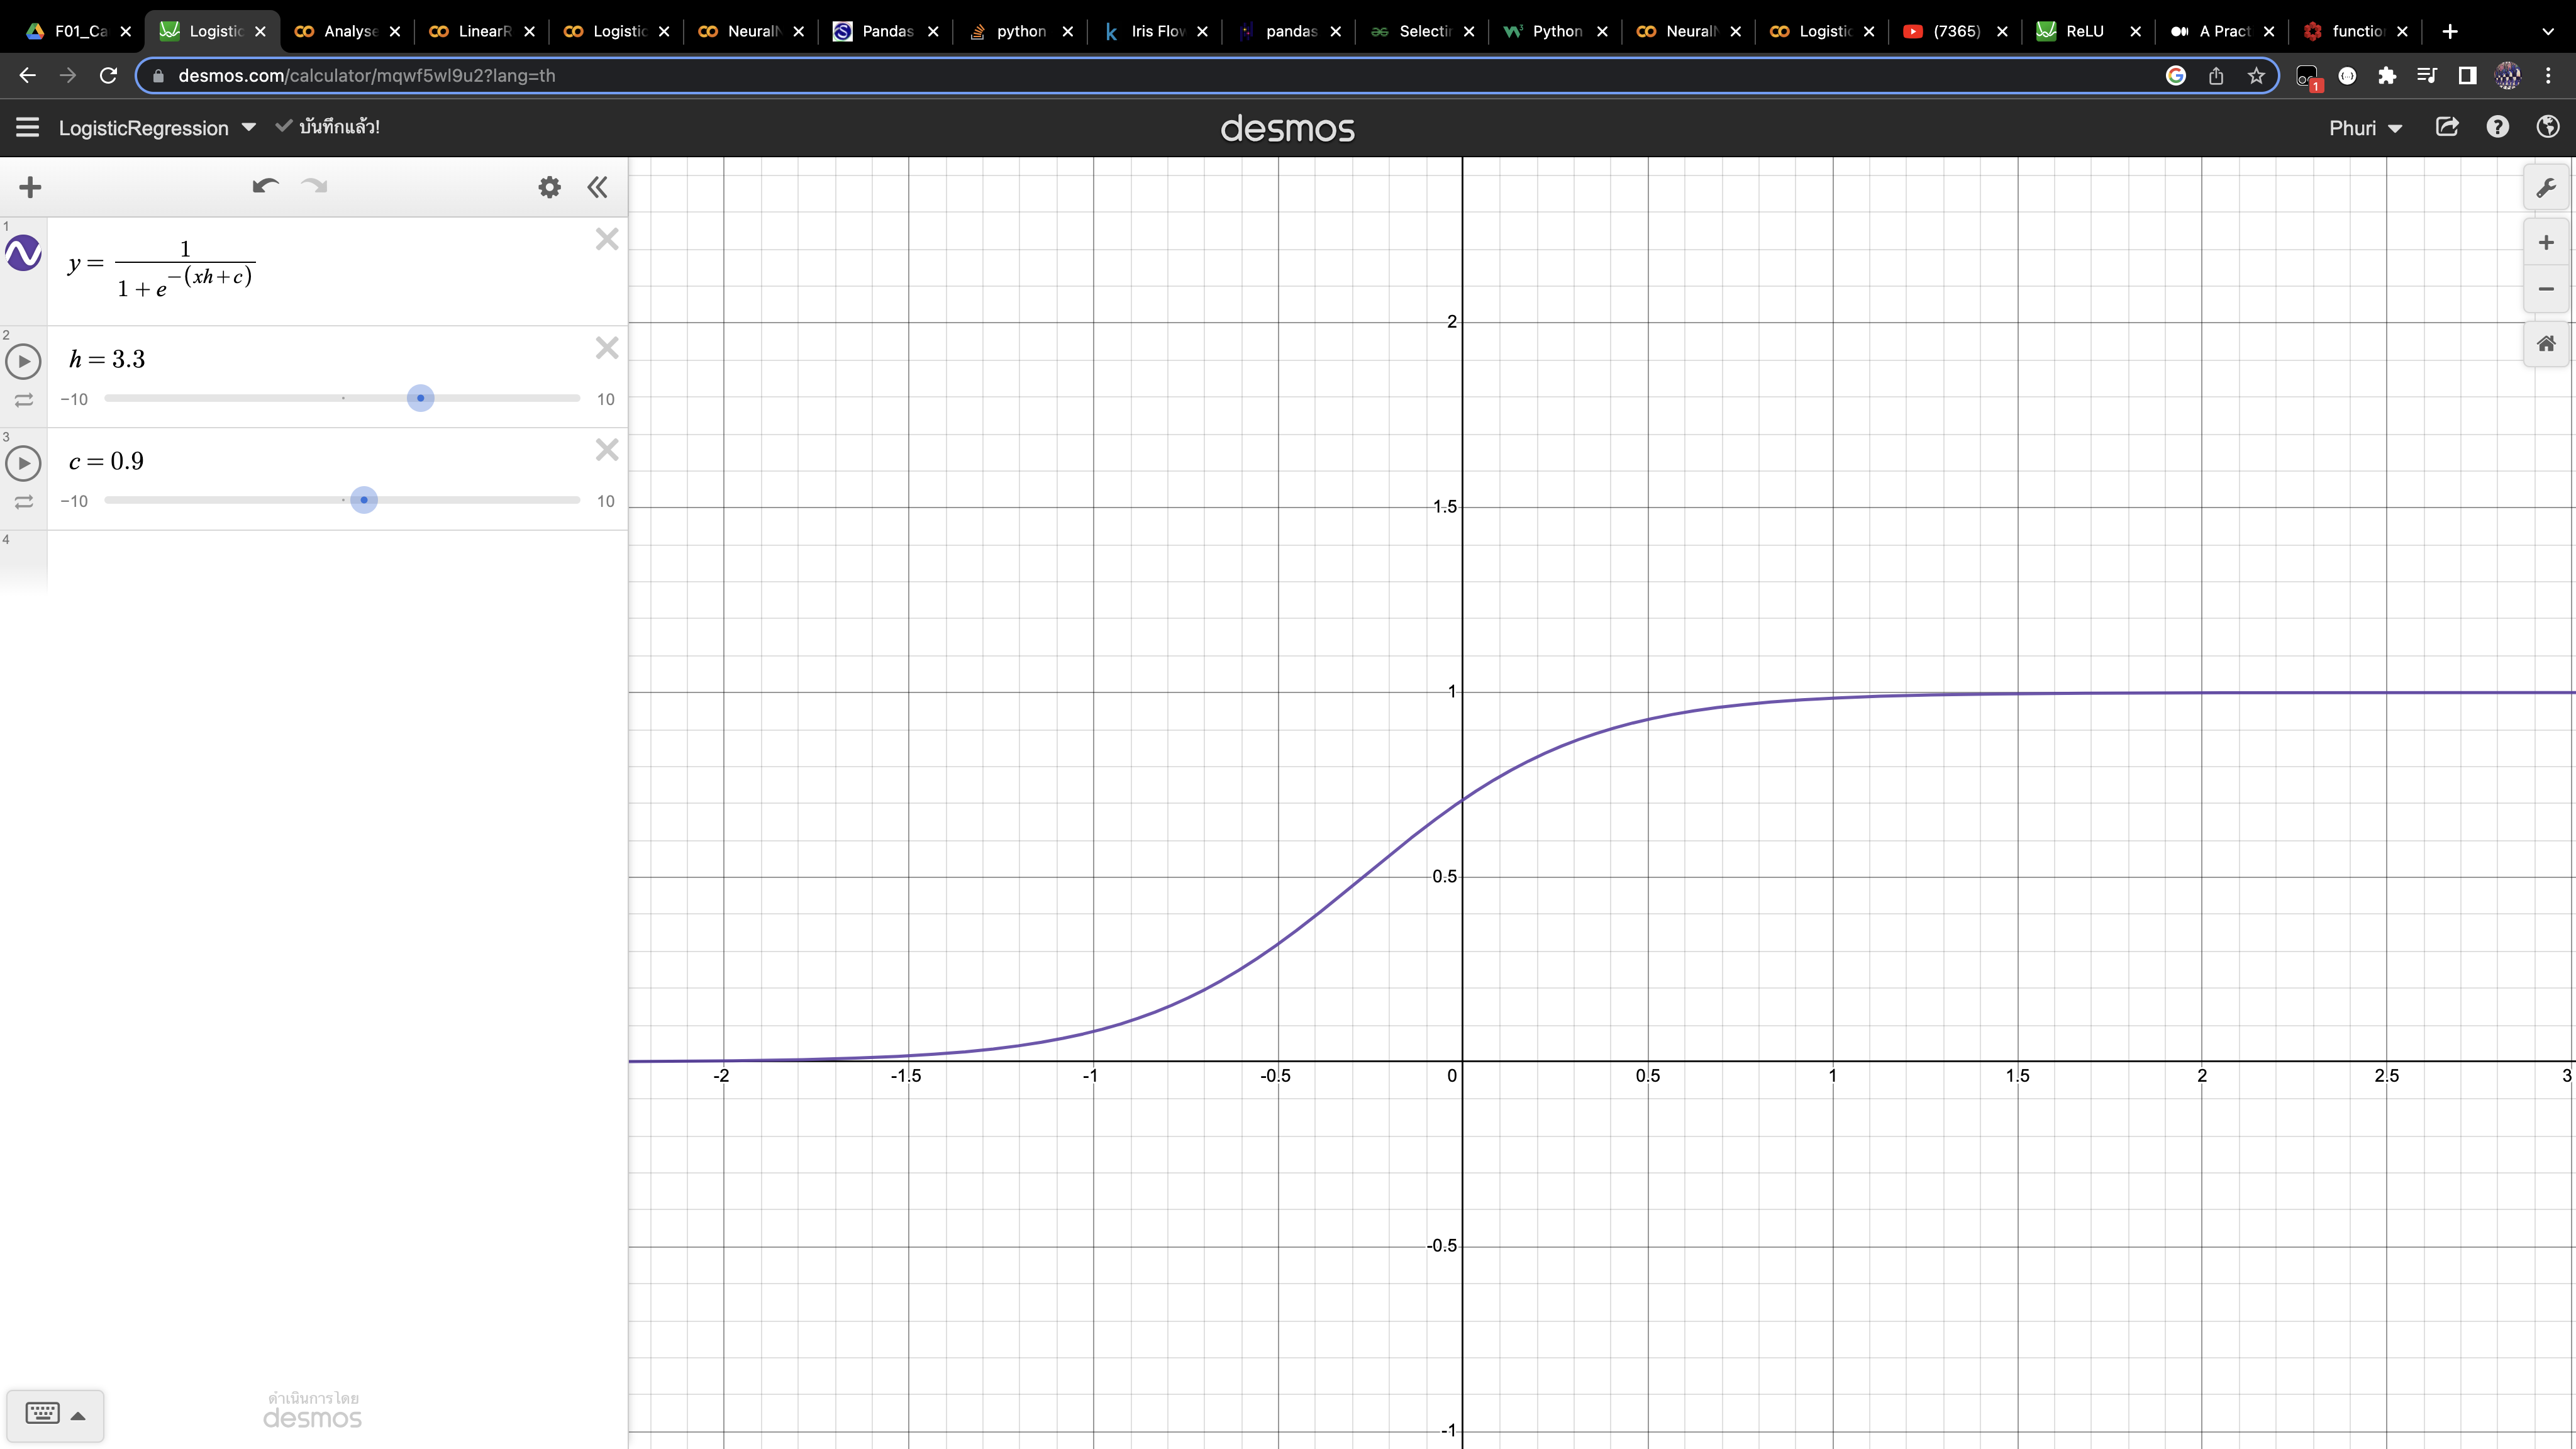

**Loss Function (Error Function)**

The Loss function is a method of evaluating how well the hypothesis function is modeling the dataset. The lower the loss function, the better the model. (https://www.analyticsvidhya.com/blog/2022/06/understanding-loss-function-in-deep-learning/)

$J=\frac{1}{m}\sum_{i=1}^m-y^{\{i\}}\ln(y'^{\{i\}})-(1-y^{\{i\}})\ln(1-y'^{\{i\}})$
* $x=$ input of the dataset
* $y=$ output of the dataset $\in[0,1]$
* $y'=$ predicted output $\in[0,1]$

Reference: 
* https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training
* https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11

**Gradient descent of logistic repression**

Gradient descent is an optimization algorithm which is used for minimizing error value of the error function

$\vec{w}:=\vec{w}-a*\frac{\partial}{\partial \vec{w}}J_n(\vec{w})$
* $\frac{\partial}{\partial \vec{w}}J_n(\vec{w})=\frac{1}{m}X_{n\times m}^T[y_{m}'-y_{m}]$

$b:=b-a*\frac{\partial}{\partial b}J_n(b)$
* $\frac{\partial}{\partial b}J_n(b)=\frac{1}{m}\vec{1}_{1\times m}^T[y_{m}'-y_{m}]$

Reference: 
* https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

###Logistic Regression implementation (with `math, pandas, numpy, matplotlib.pyplot`)

In [ ]:
def LogisR_Hypo(Coef,Inte,dX):
  return (1)/(1+np.exp(-np.dot(dX,Coef)-Inte))

def Diff_LogisR_Loss(dX,dY,Coef,Inte):
  ix=np.ones(dX.shape[0])
  return [
      (1/dX.shape[0])*np.dot(ix.T,(LogisR_Hypo(Coef,Inte,dX)-dY)),  # Intercept
      (1/dX.shape[0])*np.dot(dX.T,(LogisR_Hypo(Coef,Inte,dX)-dY))   # Coefficient
      ]
  # reference: https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

def GradientDescent(dX,dY,Diff,LRate=0.005,Decay=0.000_03,LastEpoch=10_000, AcceptError=1e-10):
  epoch=0
  Coef_Vect=np.ones(dX.shape[1])
  Inte_Cons=1
  GD_Growth=[]
  while epoch<LastEpoch or (np.all(np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[1])<=AcceptError)and (np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])<=AcceptError)):
    #print(Diff(dX,dY,Coef_Vect,Inte_Cons))
    #print(np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[1].tolist()).reshape((-1)))
    Coef_Vect-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[1].tolist()).reshape((-1))
    Inte_Cons-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[0].tolist()).reshape((-1))

    row = pd.DataFrame({
              'epoch No.': [epoch], 
              'Error': [np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])],
              })
    GD_Growth.append(row)

    # Slowly decrease learning rate.
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    epoch+=1
  GD_Growth = pd.concat(GD_Growth)
  # reference: https://stackoverflow.com/questions/28669482/appending-pandas-dataframes-generated-in-a-for-loop
  return [list(Inte_Cons),list(Coef_Vect),GD_Growth]

P_Logis=[]
for i in range(3):
  Predicted=GradientDescent(Trai_X,Trai_Y.iloc[:,i],Diff_LogisR_Loss)
  Predicted.append(Trai_Y.columns[i])
  P_Logis.append(Predicted)


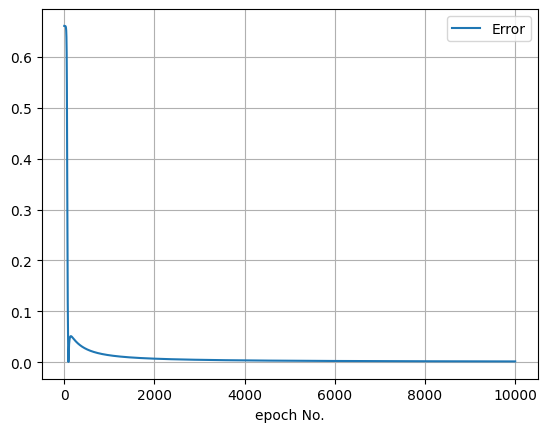

In [ ]:
P_Logis[0][2].plot(x='epoch No.',y='Error')
plt.grid()
plt.show()

###Logistic Regression implementation (with `sklearn`)

In [ ]:
from sklearn import linear_model

SK_Logis=[]
for i in range(3):
  SK_sLogis = linear_model.LogisticRegression()
  SK_sLogis.fit(Trai_X,Trai_Y.iloc[:,i])
  SK_Logis.append([SK_sLogis.coef_,SK_sLogis.intercept_,Trai_Y.columns[i]])

###Plot 2 Logistic Regression

In [ ]:
for i in SK_Logis:
  print()
  print(i[0][0])
  print(i[1][0])
  print(i[2])


[-0.43886379  0.8139433  -2.14356633 -0.90526389]
6.412352785433896
Iris-setosa

[-0.28792149 -1.68333365  0.62820607 -0.992899  ]
4.821814788164562
Iris-versicolor

[-0.34891384 -0.47957849  2.76804215  2.14644623]
-13.708859812046414
Iris-virginica


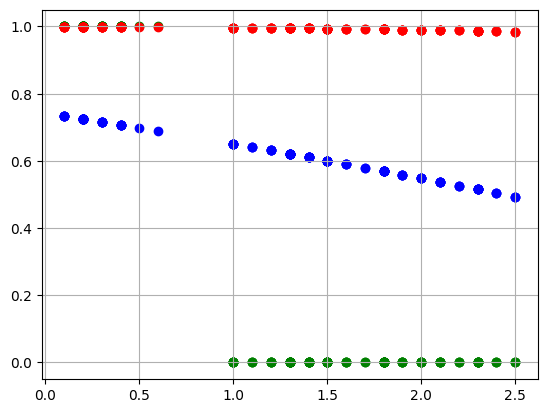

In [ ]:
def LogisR_Hypo(Coef,Inte,dX):
  return (1)/(1+np.exp(-np.dot(dX,Coef)-Inte))
flower=0    # len(Trai_Y.columns) = 3
Property=3  # len(Trai_X.columns) = 4
fig, ax = plt.subplots()
ax.scatter(
    df[Trai_X.columns[Property]],
    df[Trai_Y.columns[flower]],
    color='green'
    )

ax.scatter(
    df[Trai_X.columns[Property]],
    LogisR_Hypo(SK_Logis[flower][0][0][Property],SK_Logis[flower][1][0],df[Trai_X.columns[Property]]),
    color='red'
    )

ax.scatter(
    df[Trai_X.columns[Property]],
    LogisR_Hypo(P_Logis[flower][1][Property],P_Logis[flower][0],df[Trai_X.columns[Property]]),
    color='blue'
    )

plt.grid()
plt.show()

###Evaluating the accuracy of Logistic Regression Model with Confusion matrix
* https://meettank29067.medium.com/performance-measurement-in-logistic-regression-8c9109b25278

In [ ]:
def LogisR_Hypo(Coef,Inte,dX):
  ones=np.ones(Trai_X.shape[0])
  return (ones)/(ones+np.exp(-np.dot(dX,Coef)-Inte*ones))

LogisR_Hypo(SK_Logis[0][0].T,SK_Logis[0][1],Trai_X)

array([[0.00137545, 0.00137545, 0.00137545, ..., 0.00137545, 0.00137545,
        0.00137545],
       [0.00458887, 0.00458887, 0.00458887, ..., 0.00458887, 0.00458887,
        0.00458887],
       [0.98921354, 0.98921354, 0.98921354, ..., 0.98921354, 0.98921354,
        0.98921354],
       ...,
       [0.9564022 , 0.9564022 , 0.9564022 , ..., 0.9564022 , 0.9564022 ,
        0.9564022 ],
       [0.00165253, 0.00165253, 0.00165253, ..., 0.00165253, 0.00165253,
        0.00165253],
       [0.00897878, 0.00897878, 0.00897878, ..., 0.00897878, 0.00897878,
        0.00897878]])

In [ ]:
np.ones(Trai_X.shape[0])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
Trai_X.shape[0]

112

In [ ]:
def LogisR_Hypo(Coef,Inte,dX):
  return (1)/(1+np.exp(-np.dot(dX,Coef)-Inte))

def ConfusionMatrix(Hypo,Coef,Inte,dX,dY):
  TP=0
  FP=0
  TN=0
  FN=0
  Predictt=Hypo(Coef,Inte,dX)
  for i in range(len(dY)):
    if (Predictt[i]>=0.5 and dY.iloc[i]>=0.5):
      TP+=1
    elif (Predictt[i]>=0.5 and dY.iloc[i]<0.5):
      FP+=1
    elif (Predictt[i]<0.5 and dY.iloc[i]<0.5):
      TN+=1
    elif (Predictt[i]<0.5 and dY.iloc[i]>=0.5):
      FN+=1
  Confusion = pd.DataFrame({'Actual_Positive':[TP,FN],'Actual_Negative':[FP,TN]},index=['Predict_Positive', 'Predict_Negative'])
  
  return [Confusion,[TP,FP,TN,FN]]

#ConfusionMatrix(LogisR_Hypo,SK_Logis[0][0].T,SK_Logis[0][1],Test_X,Test_Y.iloc[:,0])[0] # 	Iris-setosa,      # SKLearn
#ConfusionMatrix(LogisR_Hypo,SK_Logis[1][0].T,SK_Logis[1][1],Test_X,Test_Y.iloc[:,1])[0] # 	Iris-versicolor,  # SKLearn
#ConfusionMatrix(LogisR_Hypo,SK_Logis[2][0].T,SK_Logis[2][1],Test_X,Test_Y.iloc[:,2])[0] # 	Iris-virginica,   # SKLearn
#ConfusionMatrix(LogisR_Hypo,P_Logis[0][1],P_Logis[0][0],Test_X,Test_Y.iloc[:,0])[0]   # 	Iris-setosa,      # My Implementation
#ConfusionMatrix(LogisR_Hypo,P_Logis[1][1],P_Logis[1][0],Test_X,Test_Y.iloc[:,1])[0]   # 	Iris-versicolor,  # My Implementation
#ConfusionMatrix(LogisR_Hypo,P_Logis[2][1],P_Logis[2][0],Test_X,Test_Y.iloc[:,2])[0]   # 	Iris-virginica,   # My Implementation

,Actual_Positive,Actual_Negative
Predict_Positive,0,12
Predict_Negative,10,16


In [ ]:
Test_Y.columns

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

#[Unfinished]: Introduction of Neural Network

###Introduction

**What is Neural Network?**

Neural network is a machine learning algorithm modeled on the human brain and nervous system. It contains an input layer (the left handed layer), hidden layers (in this picture, it have 2 layers) and output layer (the righted hand layer).



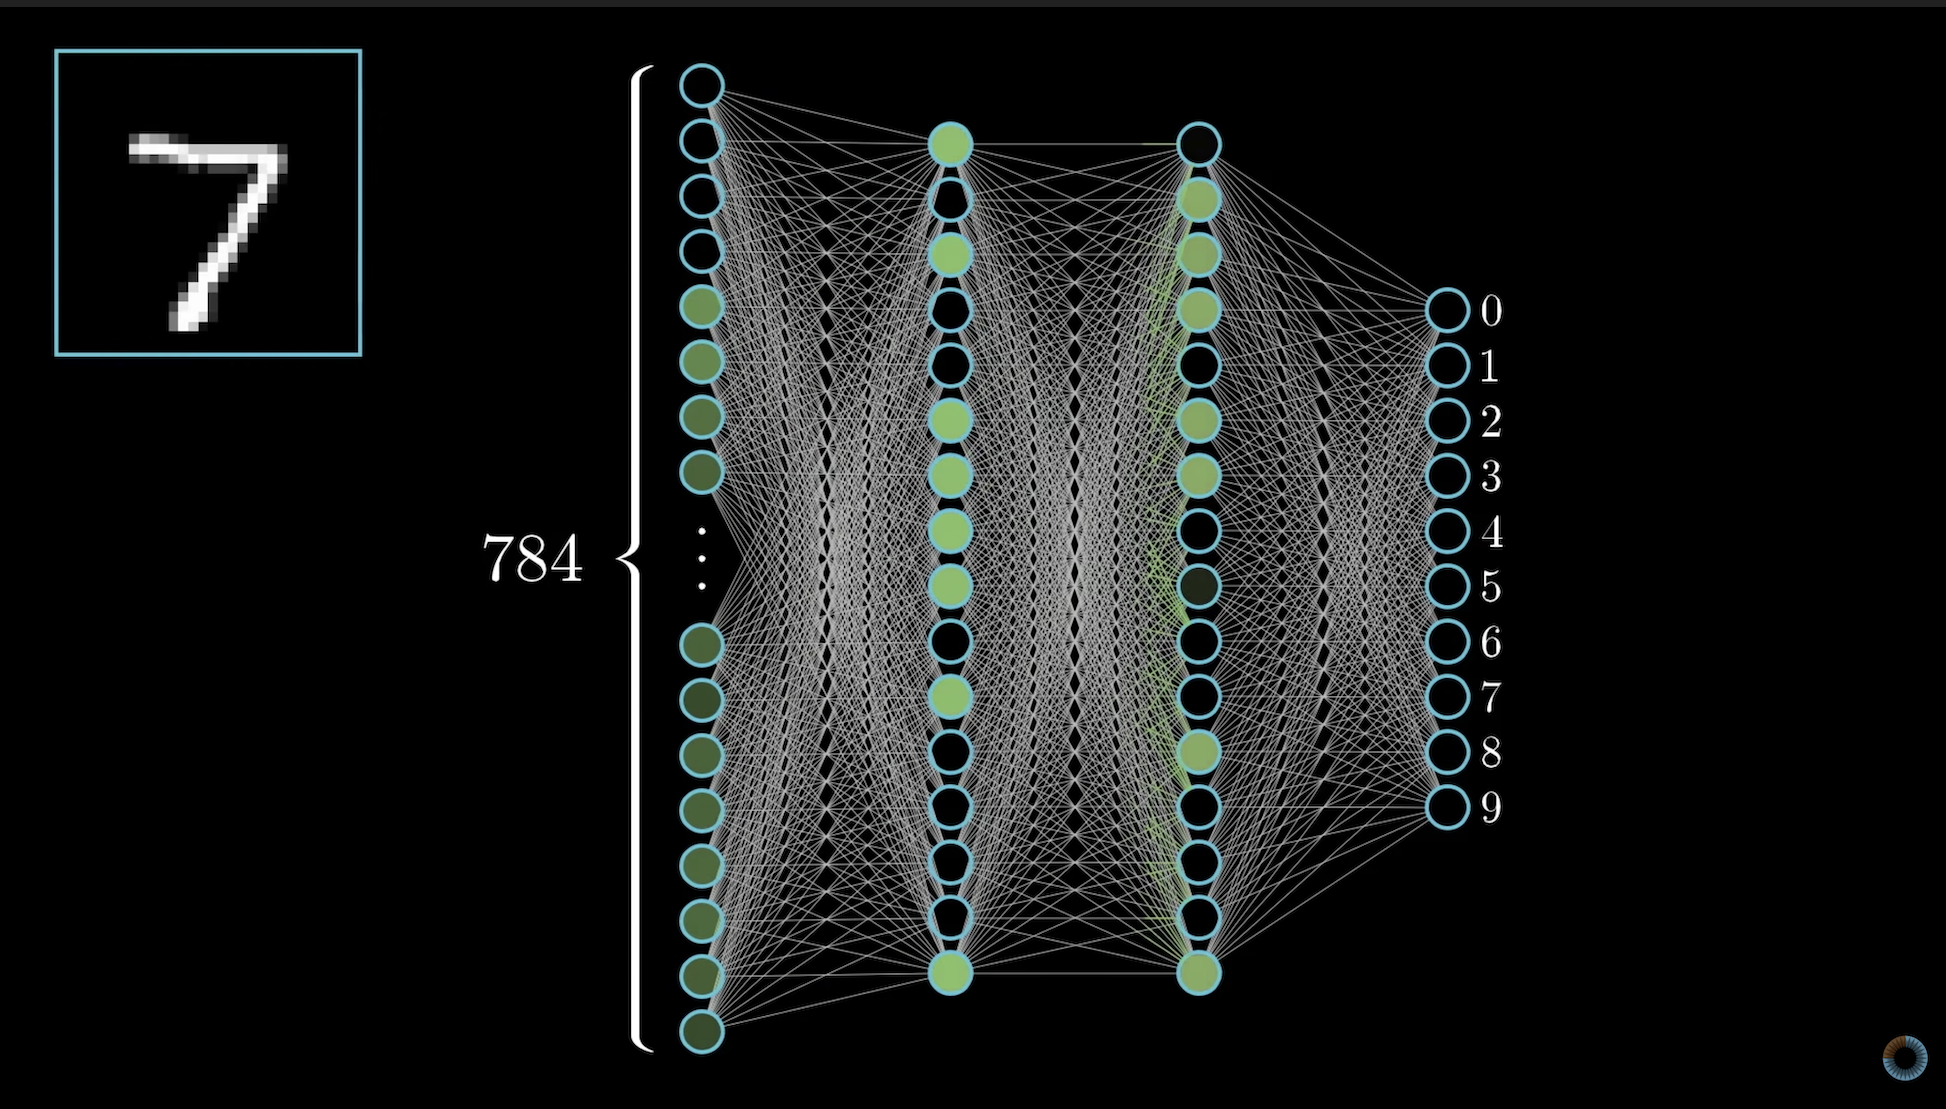

Reference: https://youtu.be/aircAruvnKk

###What is activated function?

###What is 

#[Unfinished]: ReLU (a.k.a. Rectified Linear Unit, with `math, pandas, numpy, matplotlib.pyplot`)

* https://youtu.be/68BZ5f7P94E
* https://www.kaggle.com/code/dansbecker/rectified-linear-units-relu-in-deep-learning

###Question
1. How is gradient descent works in neural network compare to logistic regression and linear regression?
2. What is Loss function of ReLU? How to train ReLU using gradient descent?
3. If the range of ReLU is $[0,\infty]$, then how each node in neural network output the value between $[0,1]$?

###To Do Now
1. Implement approximated logistic function using linear regression and ReLU
2. Watch the video about neural network

###[1]

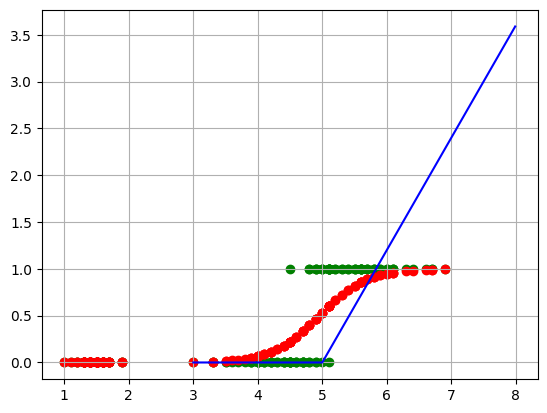

In [ ]:
def ReLU(m,c):
  x_line=np.arange(3,8,0.01)
  y_line=(abs(m*x_line+c*np.ones(len(x_line)))+m*x_line+c*np.ones(len(x_line)))/2
  # reference: https://stackoverflow.com/questions/32109319/how-to-implement-the-relu-function-in-numpy
  plt.plot(x_line,y_line,color='blue')

ReLU(1.2,-6)


def LogisR_Hypo(Coef,Inte,dX):
  return (1)/(1+np.exp(-np.dot(dX,Coef)-Inte))
flower=2    # len(Trai_Y.columns) = 3
Property=2  # len(Trai_X.columns) = 4
#fig, ax = plt.subplots()
plt.scatter(
    df[Trai_X.columns[Property]],
    df[Trai_Y.columns[flower]],
    color='green'
    )

plt.scatter(
    df[Trai_X.columns[Property]],
    LogisR_Hypo(SK_Logis[flower][0][0][Property],SK_Logis[flower][1][0],df[Trai_X.columns[Property]]),
    color='red'
    )
'''
ax.scatter(
    df[Trai_X.columns[Property]],
    LogisR_Hypo(P_Logis[flower][1][Property],P_Logis[flower][0],df[Trai_X.columns[Property]]),
    color='blue'
    )'''

plt.grid()
plt.show()

**About this graph**

This graph indicates the value of function $\text{max}(x,0)$.

**What is ReLU**

ReLU is a commonly used activate function in Neural Network. 

$\text{ReLU}(\vec{x})=\text{max}(\vec{h}\cdot\vec{x}+c,0)$
* $\vec{h}=$ coefficient
* $c=$ intercept
* $\vec{x}=$ input data
* $\text{max}(x,0)=$ a function that return $x$ if $x>0$ and return $0$ if $x\leq0$. 

**Formula ?**

$\vec{a}^{(1)}=h(W\cdot\vec{x}+\vec{b})$
* $h(x)=$ hypothesis function e.g. Sigmoid, ReLU etc.
* $\vec{x}=$ input
* $\vec{b}=$ bias
* $W=$ weight matrix
* $\vec{a}^{(1)}=$ output of the first layer of the neural network

Reference: https://youtu.be/aircAruvnKk (15:02)

In [ ]:
def LineR_DiffEvaluation_1f(dX,dY,Vector):
  res = Vector[1] * dX + Vector[0] - dY
  return [res.mean(),(res*dX).mean()]
  # reference: https://mccormickml.com/2014/03/04/gradient-descent-derivation/

def GradientDescent_1f(dX,dY,Diff,LRate=0.008,Decay=0.00002,InitialVector=[0.5,0.5],LastEpoch=10000, AcceptError=1e-10):
  epoch=0
  Vector=np.array(InitialVector)
  while epoch<LastEpoch or np.all(np.abs(Diff(dX.values.reshape(-1),dY.values.reshape(-1),Vector))<=AcceptError):
    Vector-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX.values.reshape(-1),dY.values.reshape(-1),Vector))
    # Slowly decrease learning rate.
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    epoch+=1
  return list(Vector)

H1f=GradientDescent_1f(
    Trai_X, Trai_Y,LineR_DiffEvaluation_1f
)
print(H1f)

[-1.3985467619606071, 1.1032023331634884]


In [ ]:
def ReLU(Coef,Inte,dX):
  result=np.dot(dX,Coef)-Inte
  if result<=0:
    result=0
  return result

def Diff_ReLU(Coef,Inte,dX):
  Diff=ReLU(Coef,Inte,dX)
  result=[]
  if Diff>0:
    result.append(1)
    result.append(np.ones(len(Coef)))
  else:
    result.append(0)
    result.append(np.zees(len(Coef)))
  return result 

In [ ]:
def LineR_DiffEvaluation_1f(dX,dY,Vector):
  res = Vector[1] * dX + Vector[0] - dY
  return [res.mean(),(res*dX).mean()]
  # reference: https://mccormickml.com/2014/03/04/gradient-descent-derivation/



In [ ]:
def ReLU(Coef,Inte,dX):
  result=np.dot(dX,Coef)+Inte
  print(result)
  if result<=0:
    result=0
  return result

def Diff_ReLU(dX,dY,Coef,Inte):
  Diff=ReLU(Coef,Inte,dX)
  result=[]
  if Diff>0:
    result.append(1)
    result.append(np.ones(len(Coef)))
  else:
    result.append(0)
    result.append(np.zees(len(Coef)))
  return result 

def GradientDescent(dX,dY,Diff,LRate=0.005,Decay=0.000_03,LastEpoch=10_000, AcceptError=1e-10):
  epoch=0
  Coef_Vect=np.ones(dX.shape[1])
  Inte_Cons=1
  GD_Growth=[]
  while epoch<LastEpoch or (np.all(np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[1])<=AcceptError)and (np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])<=AcceptError)):

    Coef_Vect-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[1].tolist()).reshape((-1))
    Inte_Cons-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[0].tolist()).reshape((-1))

    row = pd.DataFrame({
              'epoch No.': [epoch], 
              'Error': [np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])],
              })
    GD_Growth.append(row)

    # Slowly decrease learning rate.
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    epoch+=1
  GD_Growth = pd.concat(GD_Growth)
  # reference: https://stackoverflow.com/questions/28669482/appending-pandas-dataframes-generated-in-a-for-loop
  return [list(Inte_Cons),list(Coef_Vect),GD_Growth]

P_ReLU=[]
for i in range(3):
  Predicted=GradientDescent(Trai_X,Trai_Y.iloc[:,i],Diff_ReLU)
  Predicted.append(Trai_Y.columns[i])
  P_ReLU.append(Predicted)


#[Unfinished]: Neural Network (with `math, pandas, numpy, matplotlib.pyplot`)

###Get Data

In [ ]:
from sklearn.datasets import fetch_openml
#from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Import Data Set
mnist = fetch_openml('mnist_784', as_frame=False, cache=False)
# time: 30s

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print('mnist')
print(type(mnist))
# <class 'sklearn.utils.Bunch'>
print(mnist)
'''
{
  'data': array(
       [[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]
       ), 
  'target': array(
       ['5', '0', '4', ..., '4', '5', '6'], 
       dtype=object
       ),   
  'frame': None, 
  'categories': {}, 
  'feature_names': ['pixel1', 'pixel2', 'pixel3', ..., 'pixel784'], 
  'target_names': ['class'],
  'DESCR': 
      "\*
      **Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
      **Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
      **Please cite**:  

      The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

      It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.  

      With some classification methods (particularly template-based methods, such as SVM and K-nearest neighbors), the error rate improves when the digits are centered by bounding box rather than center of mass. If you do this kind of pre-processing, you should report it in your publications. The MNIST database was constructed from NIST's NIST originally designated SD-3 as their training set and SD-1 as their test set. However, SD-3 is much cleaner and easier to recognize than SD-1. The reason for this can be found on the fact that SD-3 was collected among Census Bureau employees, while SD-1 was collected among high-school students. Drawing sensible conclusions from learning experiments requires that the result be independent of the choice of training set and test among the complete set of samples. Therefore it was necessary to build a new database by mixing NIST's datasets.  

      The MNIST training set is composed of 30,000 patterns from SD-3 and 30,000 patterns from SD-1. Our test set was composed of 5,000 patterns from SD-3 and 5,000 patterns from SD-1. The 60,000 pattern training set contained examples from approximately 250 writers. We made sure that the sets of writers of the training set and test set were disjoint. SD-1 contains 58,527 digit images written by 500 different writers. In contrast to SD-3, where blocks of data from each writer appeared in sequence, the data in SD-1 is scrambled. Writer identities for SD-1 is available and we used this information to unscramble the writers. We then split SD-1 in two: characters written by the first 250 writers went into our new training set. The remaining 250 writers were placed in our test set. Thus we had two sets with nearly 30,000 examples each. The new training set was completed with enough examples from SD-3, starting at pattern # 0, to make a full set of 60,000 training patterns. Similarly, the new test set was completed with SD-3 examples starting at pattern # 35,000 to make a full set with 60,000 test patterns. Only a subset of 10,000 test images (5,000 from SD-1 and 5,000 from SD-3) is available on this site. The full 60,000 sample training set is available.

      Downloaded from openml.org.
      *\",
  'details': 
      { 
        'id': '554', 
        'name': 'mnist_784', 
        'version': '1', 
        'description_version': '1', 
        'format': 'ARFF', 
        'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'], 
        'upload_date': '2014-09-29T03:28:38', 
        'language': 'English', 
        'licence': 'Public', 
        'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff', 
        'parquet_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq', 
        'file_id': '52667', 
        'default_target_attribute': 'class', 
        'tag': ['AzurePilot', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision'], 
        'visibility': 'public', 
        'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq', 
        'status': 'active', 
        'processing_date': '2020-11-20 20:12:09', 
        'md5_checksum': '0298d579eb1b86163de7723944c7e495'
      }, 
  'url': 'https://www.openml.org/d/554'}
'''

# The 'mnist' data set is in a JSON format.
'''
mnist.data            # input ndarray (mnist.data)
mnist.target          # output ndarray (mnist.target).
mnist.frame           # 
mnist.feature_names   # 
mnist.target_names    # 
mnist.DESCR           # The description of the data. 
                      # This message indicate who is the owner of the data.
                      # When is the data created?
                      # What is the purpose of the data
                      # And other fact about the data.
mnist.details         # Other details about the data.
mnist.url             # url link
'''

In [ ]:
# Change Type of Data inside X and y
Data_X = mnist.data.astype('float32') # This variable are 'np.ndarray'
Data_Y = mnist.target.astype('int64') # This variable are 'np.ndarray'

# To avoid big weights that deal with the pixel values from between [0, 255], we scale `X` down. A commonly used range is [0, 1].
Data_X /= 255.0 

In [ ]:
# Shape of the data

#print(Data_X.shape)
#(70000, 784)

#print(Data_Y.shape)
#(70000,)

# Separate training and evaluating data in order to evaluate how well the algorithm predict data out side its data set.

def unison_shuffled_copies(dx, dy):
    if len(dx) == len(dy):
      p = np.random.permutation(len(dx))
      return [dx[p], dy[p]]
    else:
      print('The length of both np.arrays are not equal!')
    # reference: https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison

def SeparateData(dx,dy,Ratio):
  DataRatio = int(dx.shape[0]*Ratio)
  ShuffledData=unison_shuffled_copies(dx,dy)

  TrainX=ShuffledData[0][:DataRatio]#.sample(frac = 1)
  TrainY=ShuffledData[1][:DataRatio]#.sample(frac = 1)
  TesttX=ShuffledData[0][DataRatio:]#.sample(frac = 1)
  TesttY=ShuffledData[1][DataRatio:]#.sample(frac = 1)

  return [TrainX,TrainY,TesttX,TesttY]

DATAset = SeparateData(Data_X,Data_Y,0.75)
Trai_X = DATAset[0]
Trai_Y = DATAset[1]
Test_X = DATAset[2]
Test_Y = DATAset[3]

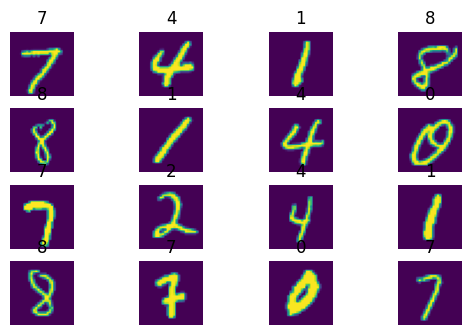

In [ ]:
import matplotlib.pyplot as plt
import math

def plot_examples(X, y,first,last,row):

    # Convert each X elements from 784 vector into 28x28 matrix.
    Xsq=X[first:last].reshape(-1, 28, 28)
    Ysq=y[first:last]

    InputOutputPair=zip(Xsq, y[first:last])

    # This code is same as previous code
    for i in range(len(Xsq)):
        plt.subplot(row,int(last/row),1 + i)
        plt.imshow(Xsq[i])
        plt.axis("off")
        plt.title(Ysq[i])

def plot_example(X,y,index):
  plt.imshow(X[index].reshape(28, 28))
  plt.title(y[index])

#plot_examples(Trai_X,Trai_Y,first=4,last=20,row=5)
plot_examples(Test_X,Test_Y,first=4,last=20,row=5)
#plot_example(Trai_X,Trai_Y,0)
#plot_example(Test_X,Test_Y,0)

###Introduction of Neural Network

###Q and A

**Q: What does the hidden layer in a neural network compute?**

A:

**Three sentence version:**

* Each layer can apply any function you want to the previous layer (usually a linear transformation followed by a squashing nonlinearity).
* The hidden layers' job is to transform the inputs into something that the output layer can use.
* The output layer transforms the hidden layer activations into whatever scale you wanted your output to be on.

**Like you're 5:**

If you want a computer to tell you if there's a bus in a picture, the computer might have an easier time if it had the right tools.

So your bus detector might be made of a wheel detector (to help tell you it's a vehicle) and a box detector (since the bus is shaped like a big box) and a size detector (to tell you it's too big to be a car). These are the three elements of your hidden layer: they're not part of the raw image, they're tools you designed to help you identify busses.

If all three of those detectors turn on (or perhaps if they're especially active), then there's a good chance you have a bus in front of you.

Neural nets are useful because there are good tools (like backpropagation) for building lots of detectors and putting them together.

**Reference:** https://stats.stackexchange.com/questions/63152/what-does-the-hidden-layer-in-a-neural-network-compute

###Neural Network implementation (with `math, pandas, numpy, matplotlib.pyplot`)

###Neural Network implementation (with `sklearn`)

###Evaluating the accuracy of Neural Network models